In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
from segmentation import segmentation_threshold, segmentation_sobel
from features import *
from skimage.color import rgb2gray

from sklearn.cluster import KMeans

def warn(*args, **kwargs):
    pass
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.warn = warn

In [2]:
# data_dir = "C:/Users/shetabs1/Desktop/malaria/"
# classes = {"Uninfected":1, "Parasitized":0}
#data_dir = "C:/Users/shetabs1/Documents/exp12_donor_3/"
#classes = ["1_Synapses", "4_T_cell_Synapse", "3_Multiple_Synapses" ]  
          
data_dir = "data/mednist/MedNIST/"
classes = ["AbdomenCT", "BreastMRI", "ChestCT", "CXR", "Hand", "HeadCT"]  

In [8]:

def daisy_features(image):
    """calculates the set of cell-skeleton based features 
    
    Calculates medial axis of the segmented cell and calculates the length,
    maximum and minimum thickness of the skeleton

    Parameters
    ----------
    image : 3D array, shape (M, N, C)
        The input image with multiple channels.

    Returns
    -------
    features :  dict  
        dictionary including percentiles, moments and sum per channel 

    """
    # storing the feature values
    features = dict()
    
    # calculating the pixels per cells 
    for ch in range(image.shap[2]):
        temp_image = resize(image[:,:,ch].copy(), (32,32))
        daisy_features = daisy(temp_image, step=4, radius=9).reshape(1, -1)
        for i in range(len(hog_features)):
            features["daisy_" + str(i) + "_Ch" + str(ch+1)] = daisy_features[i]

    return features


In [3]:
df_features = pd.DataFrame()
Y = []


In [17]:
def daisy_features(image):
    """calculates the set of cell-skeleton based features 
    
    Calculates medial axis of the segmented cell and calculates the length,
    maximum and minimum thickness of the skeleton

    Parameters
    ----------
    image : 3D array, shape (M, N, C)
        The input image with multiple channels.

    Returns
    -------
    features :  dict  
        dictionary including percentiles, moments and sum per channel 

    """
    # storing the feature values
    features = dict()
    
    # calculating the pixels per cells 
    for ch in range(image.shape[2]):
        temp_image = resize(image[:,:,ch].copy(), (32,32))
        daisy_features = daisy(temp_image, step=4, radius=9).reshape(1, -1)
        for i in range(daisy_features.shape[1]):
            features["daisy_" + str(i) + "_Ch" + str(ch+1)] = daisy_features[0][i]

    return features

In [18]:
%time 
from random import sample
from skimage.transform import resize
n = 400
for cl in classes:
    print(cl)
    files = glob.glob(os.path.join(data_dir,cl,"*.jpeg"))
    files = sample(files, k = n)
    for i, f in enumerate(files):
        #image = resize(imread(f), (32,32))
        image = imread(f)
        image = image.reshape(image.shape[0],image.shape[1],1) 
        #mask = segmentation_threshold(image)
        #mask[:,:,0] = segmentation_sobel(image)[:,:,0]
        #image = mask*image
        featuers = dict()
        #featuers.update(clustering_features(image))
        featuers.update(daisy_features(image))
        #featuers.update(basic_statistical_features(image))
        #featuers.update(glcm_features(image)) 
        #featuers.update(cross_channel_distance_features(image))
        #featuers.update(cross_channel_boolean_distance_features(mask))
        #featuers.update(hog_features(image))
        #featuers.update(histogram_features(image)) 
        #featuers.update(moments_features(image))
        #featuers.update(skeleton_features(mask)) 
        #featuers.update(cell_level_shape_features(mask))
        #featuers.update(haar_like_features(image))
        df_features = df_features.append(featuers, ignore_index=True) 
        Y.append(cl)


Wall time: 0 ns
AbdomenCT
BreastMRI
ChestCT
CXR
Hand
HeadCT


In [19]:
df_features

,daisy_0_Ch1,daisy_1000_Ch1,daisy_1001_Ch1,daisy_1002_Ch1,daisy_1003_Ch1,daisy_1004_Ch1,daisy_1005_Ch1,daisy_1006_Ch1,daisy_1007_Ch1,daisy_1008_Ch1,...,daisy_992_Ch1,daisy_993_Ch1,daisy_994_Ch1,daisy_995_Ch1,daisy_996_Ch1,daisy_997_Ch1,daisy_998_Ch1,daisy_999_Ch1,daisy_99_Ch1,daisy_9_Ch1
0,0.000664,0.002658,0.006439,0.006596,0.003548,0.004699,0.006913,0.006705,0.003204,0.004523,...,0.001324,0.002110,0.002252,0.001347,0.001566,0.002975,0.003964,0.002176,0.005285,0.001293
1,0.004574,0.003393,0.003180,0.001934,0.001910,0.003972,0.004695,0.005667,0.003883,0.004664,...,0.001924,0.002611,0.002232,0.001758,0.002064,0.002737,0.003685,0.002434,0.004298,0.002989
2,0.003373,0.002768,0.003544,0.003469,0.003310,0.005656,0.008623,0.007412,0.003500,0.005772,...,0.001985,0.002676,0.002443,0.001801,0.002214,0.003471,0.004018,0.002538,0.004657,0.002955
3,0.001267,0.003711,0.003822,0.003468,0.002426,0.003884,0.006313,0.008229,0.005488,0.003273,...,0.001255,0.001404,0.001463,0.001149,0.001355,0.002343,0.003243,0.002027,0.006607,0.003313
4,0.001173,0.004793,0.003078,0.001329,0.001344,0.003621,0.009226,0.013892,0.009585,0.004809,...,0.001442,0.001448,0.001178,0.001151,0.001628,0.002724,0.003961,0.002431,0.007004,0.001522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.000259,0.001589,0.001363,0.001768,0.004155,0.016021,0.025693,0.014267,0.004228,0.011747,...,0.002460,0.001171,0.000821,0.000951,0.002325,0.004621,0.006101,0.004223,0.004506,0.000711
2396,0.012429,0.009912,0.008589,0.003811,0.002191,0.004516,0.007114,0.008322,0.008968,0.003352,...,0.004694,0.004893,0.003624,0.003196,0.004758,0.006320,0.006294,0.004806,0.004343,0.006359
2397,0.003193,0.004633,0.003822,0.003904,0.002523,0.003081,0.006524,0.007906,0.005663,0.011355,...,0.005441,0.005921,0.004232,0.003506,0.005704,0.008304,0.008866,0.006151,0.003049,0.013844
2398,0.008192,0.003742,0.004926,0.004014,0.003196,0.002025,0.001244,0.000870,0.001640,0.002140,...,0.004954,0.005231,0.005331,0.004221,0.003743,0.005695,0.008395,0.006451,0.006317,0.009927


In [20]:
df_features.shape

(2400, 3200)

In [21]:
df_features = df_features.dropna(axis=1)

In [22]:
df_features.shape

(2400, 3200)

In [23]:


# Compare Algorithms
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier

#
X = df_features.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=314)


# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('SGD', SGDClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel = "linear")))
models.append(('kSVM', SVC(kernel = "rbf")))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_macro'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



LR: 0.979174 (0.004110)
SGD: 0.976290 (0.007790)
LDA: 0.966074 (0.010409)
KNN: 0.970556 (0.008383)
CART: 0.915611 (0.024501)
NB: 0.905223 (0.017559)
SVM: 0.987534 (0.001050)
kSVM: 0.907134 (0.013642)
RF: 0.955014 (0.013412)


KeyboardInterrupt: 

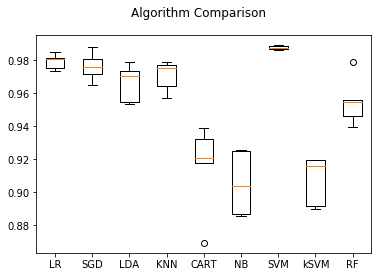

In [24]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

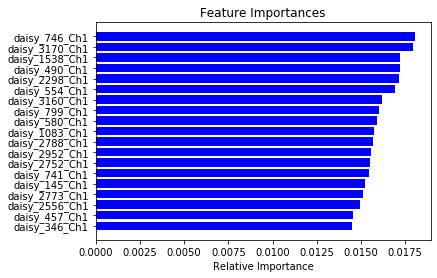

In [25]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importances = model.feature_importances_
    
indices = np.argsort(importances)[-20:-1]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [df_features.columns.values[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

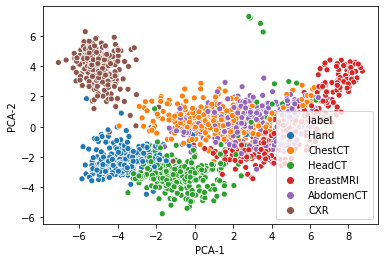

In [26]:
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca_embedded = PCA(n_components=2).fit_transform(X_train)

df = pd.DataFrame()
df["PCA-1"] = pca_embedded[:,0]
df["PCA-2"] = pca_embedded[:,1]
df["label"] = y_train

sns.scatterplot(data=df, x="PCA-1", y="PCA-2", hue = "label")

In [27]:
X_embedded = TSNE(n_components=2).fit_transform(X_train)

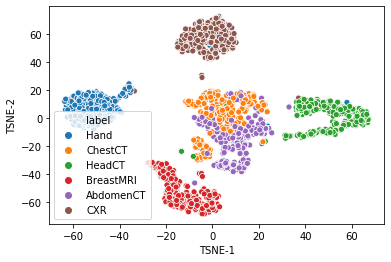

In [28]:
df = pd.DataFrame()
df["TSNE-1"] = X_embedded[:,0]
df["TSNE-2"] = X_embedded[:,1]
df["label"] = y_train

sns.scatterplot(data=df, x="TSNE-1", y="TSNE-2", hue = "label")

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = df.shape[0]

# Split the dataset in two equal parts

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have an full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X_train, y_train)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

    
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models1 = {
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [ ]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X_train, y_train, scoring='f1_macro', n_jobs=2)

In [ ]:
plt.imshow(image[:,:,0]>0.)

In [ ]:
from scipy.fft import *

In [ ]:
from scipy import fft

In [ ]:
plt.imshow(np.abs(fft(image[:,:,0])))

In [ ]:
from scipy.fftpack import dct. sc_diff

In [ ]:
plt.imshow(dct(image[:,:,0]))

In [ ]:
np.fft.fftfreq(np.fft.irfft2(np.fft.rfft2(image[:,:,0]) ) )

In [ ]:
from skimage.feature import ORB

In [ ]:
orb_extractor = ORB()

In [ ]:
orb_extractor.detect_and_extract(image[:,:,0])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5).fit(image[:,:,0].reshape(32*32,1))

        

In [ ]:
kmeans.cluster_centers_